# Polynomial Interpolation

In [7]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

Given $d+1$ data points $(t_0,y_0), \dots , (t_d,y_d)$ there exists a unique polynomial of degree $d$

$$
p(t) = c_0 + c_1 t + \cdots + c_d t^d
$$

such that $p(t_k) = y_k$ for each $k=0,\dots,d$. The coefficients $c_k$ are unknown and each data point gives us an equation

$$
\begin{align*}
c_0 + c_1t_1 + \cdots + c_d t_1^d &= y_1 \\
c_0 + c_1t_2 + \cdots + c_d t_2^d &= y_2 \\
& \vdots \\
c_0 + c_1t_d + \cdots + c_d t_d^d &= y_d
\end{align*}
$$

This yields a system of equations $A \boldsymbol{c} = \boldsymbol{y}$

$$
\begin{bmatrix}
1 & t_1 & \cdots & t_1^d \\
1 & t_2 & \cdots & t_2^d \\
\vdots & \vdots & \ddots & \vdots \\
 1 & t_d & \cdots & t_d^d
\end{bmatrix}
\begin{bmatrix} c_0 \\ c_1 \\ \vdots \\ c_d \end{bmatrix}
=
\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_d \end{bmatrix}
$$

The matrix $A$ is called a [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix).

## Example 1

Start with data points for which we know the solution. Consider $(-1,1),(0,0),(1,1)$. The parabola $p(t) = t^2$ is the unique polynomial which interpolates these points. Let's create the system using [`numpy.vander`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) and solve with [`scipy.linalg.solve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html).

In [8]:
t = np.array([-1,0,1])
y = np.array([1,0,1])
A = np.vander(t,increasing=True)

In [9]:
print(A)

[[ 1 -1  1]
 [ 1  0  0]
 [ 1  1  1]]


In [10]:
c = la.solve(A,y)

In [11]:
print(c)

[0. 0. 1.]


The solution corresponds to the coefficients $c_0=0$, $c_1=0$ and $c_2=1$. That is $p(t) = t^2$.

## Example 2

Let's try a cubic polyniomial which interpolates $(0,0),(1,1),(2,0),(3,0)$.

In [12]:
t = np.array([0,1,2,3])
y = np.array([0,1,0,0])
A = np.vander(t,increasing=True)
c = la.solve(A,y)
print(c)

[ 0.   3.  -2.5  0.5]


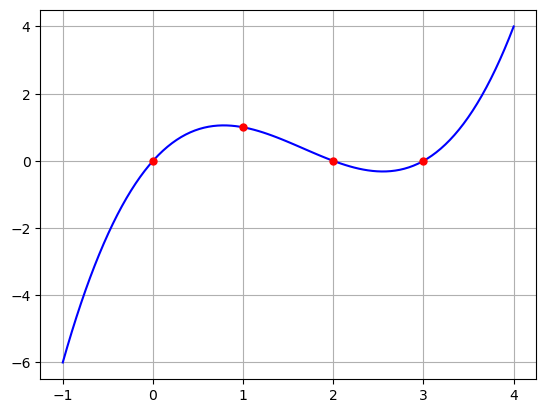

In [13]:
T = np.linspace(-1,4,100)
Y = c[0] + c[1]*T + c[2]*T**2 + c[3]*T**3
plt.plot(T,Y,'b-',t,y,'r.',markersize=10)
plt.grid(True)
plt.show()

## Example 3

Same thing again, but now with a few more data points. 

In [14]:
t = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([0,1,0,4,12,7,1,-3,-2,0,4])
A = np.vander(t,increasing=True)
c = la.solve(A,y)
print(c)

[ 0.00000000e+00 -1.82778571e+02  4.99931945e+02 -5.37972421e+02
  3.05756564e+02 -1.02882986e+02  2.15793403e+01 -2.85545635e+00
  2.31944445e-01 -1.05654762e-02  2.06679894e-04]


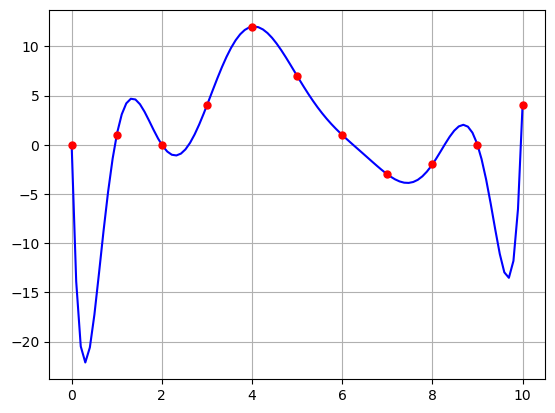

In [15]:
T = np.linspace(0,10,100)
Y = c[0] + c[1]*T + c[2]*T**2 + c[3]*T**3 + c[4]*T**4 + c[5]*T**5 + c[6]*T**6 + c[7]*T**7 + c[8]*T**8 + c[9]*T**9 + c[10]*T**10
plt.plot(T,Y,'b-',t,y,'r.',markersize=10)
plt.grid(True)
plt.show()

Would you say that this interpolant looks like a fitting function to describe the data points? (Look especially at the end points!) 

## Example 4

What happens to the condition number as $N$ increases when $t_0,t_1,\dots,t_N$ are $N+1$ equally spaced points from 0 to 1? That is, $t_k = k/N$, $k=0,\dots,N$.

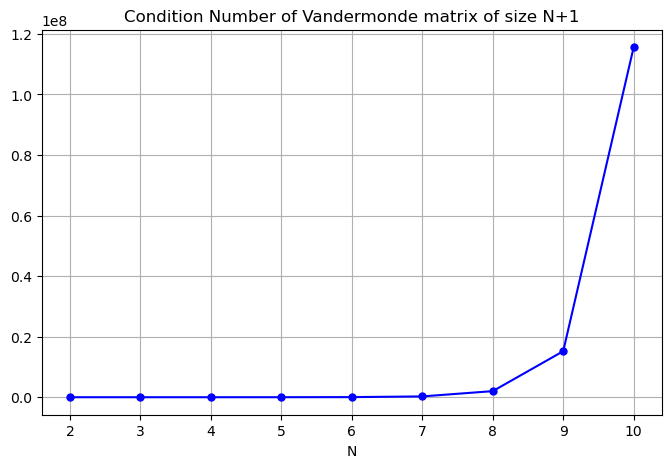

In [16]:
C = []
Nmax = 11
for N in range(2,Nmax):
    t = np.linspace(0,1,N+1)
    A = np.vander(t)
    c = np.linalg.cond(A)
    C.append(c)
plt.figure(figsize=(8,5))
plt.plot(range(2,Nmax),C,'b.-',markersize=10)
plt.title('Condition Number of Vandermonde matrix of size N+1')
plt.grid(True)
plt.xlabel('N')
plt.show()

In [11]:
C[-1]

115575244.52774188

The condition number for $N=10$ is around $10^8$. Yikes!

## Example 5

Let's interpolate the points $\sin(\pi t_k)$ for $t_k = k/N$ for $N=15$.

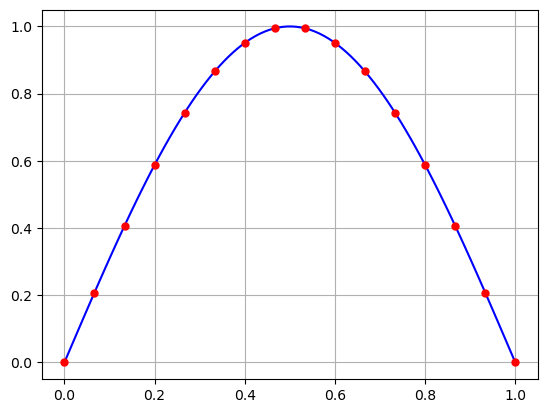

In [17]:
N = 15
t = np.linspace(0,1,N+1)
y = np.sin(np.pi*t)
A = np.vander(t,increasing=True)
c = la.solve(A,y)
T = np.linspace(0,1,100)
Y = sum([c[k]*T**k for k in range(0,len(c))])
plt.plot(T,Y,'b-',t,y,'r.',markersize=10)
plt.grid(True)
plt.show()

The interpolating polynomial is very nice! But what happens if we introduce some random noise in the data.

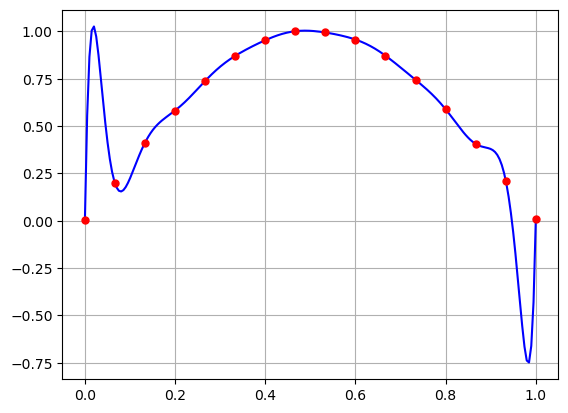

In [20]:
N = 15
t = np.linspace(0,1,N+1)
noise = 0.005*np.random.randn(t.size)
y = np.sin(np.pi*t) + noise
A = np.vander(t,increasing=True)
c = la.solve(A,y)
T = np.linspace(0,1,200)
Y = sum([c[k]*T**k for k in range(0,len(c))])
plt.plot(T,Y,'b-',t,y,'r.',markersize=10)
plt.grid(True)
plt.show()

Yikes! The interpolating polynomial is very sensitive to small changes in the $y$ values! That's because the condition number is large!